 Age : age of the patient [years]

 Sex : sex of the patient [M: Male, F: Female]
 
 ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
 
 RestingBP : resting blood pressure [mm Hg]
 
 Cholesterol : serum cholesterol [mm/dl]
 
 FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
 
 RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
 
 depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
 
 MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
 
 ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
 
 Oldpeak : oldpeak = ST [Numeric value measured in depression]
 
 ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
 \
 HeartDisease : output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC





In [2]:
dataset = pd.read_csv("heartd.csv")

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,Normal,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,Normal,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,Normal,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,Normal,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,Normal,0,LVH,120,N,3.5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,44,M,ASY,135,High,0,Normal,135,N,0.0,Flat,1
914,53,M,NAP,145,High,0,Normal,130,N,0.0,Flat,1
915,32,M,ASY,118,High,0,Normal,130,N,0.0,Flat,1
916,67,F,NAP,115,High,0,LVH,160,N,1.6,Flat,0


In [4]:
dataset.duplicated().value_counts()

False    918
Name: count, dtype: int64

In [5]:
dataset["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [6]:
dataset["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [7]:
dataset["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [8]:
target = dataset['HeartDisease']

In [9]:
dataset["Oldpeak"].unique()

array([ 0. ,  1.5,  3.5,  2.5,  0.2,  1.2,  1. ,  0.6,  1.6,  0.8,  2. ,
       -0.1,  6.2,  3.6,  2.8,  3. ,  2.6,  0.3,  0.4,  1.4,  0.1,  2.1,
        0.5,  4. ,  1.9,  3.4,  1.1,  0.9,  3.1,  2.4,  1.8,  0.7,  1.3,
        2.2,  5.6,  3.2,  1.7,  2.3,  5. ,  3.8, -0.9, -2.6, -1.5, -1. ,
       -1.1, -0.7, -0.8,  3.7, -0.5, -2. ,  2.9,  4.2,  4.4])

In [10]:
from sklearn.preprocessing import LabelEncoder
labelSex = LabelEncoder()
labelChestPainType = LabelEncoder()
labelRestingECG = LabelEncoder()
labelExerciseAngina = LabelEncoder()
labelST_Slope = LabelEncoder()
dataset['Label Sex'] = labelChestPainType.fit_transform(dataset['Sex'])
dataset['Label ChestPainType'] = labelChestPainType.fit_transform(dataset['ChestPainType'])
dataset['Label RestingECG'] = labelRestingECG.fit_transform(dataset['RestingECG'])
dataset['Label ExerciseAngina'] = labelExerciseAngina.fit_transform(dataset['ExerciseAngina'])
dataset['Label ST_Slope'] = labelST_Slope.fit_transform(dataset['ST_Slope'])
dataset = dataset.drop(['Sex', 'ChestPainType' , 'RestingECG', 'ExerciseAngina', 'ST_Slope'] , axis = 'columns')
dataset['Cholesterol'].replace(['Normal', 'Borderline','High'],
                         [0,1,2], inplace=True)

In [11]:
dataset["Cholesterol"].unique()

array([0, 1, 2], dtype=int64)

In [12]:
# from sklearn.impute import SimpleImputer
# ImputedModule = SimpleImputer(missing_values =0, strategy ='mean')
# x=x.values.reshape(-1,1)
# ImputedX = ImputedModule.fit(x)

# x = ImputedX.transform(x)


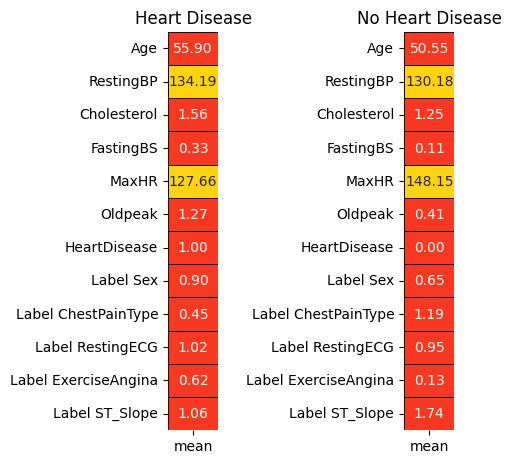

In [13]:
yes = dataset[dataset['HeartDisease'] == 1].describe().T
no = dataset[dataset['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [14]:
dataset["Cholesterol"].unique()

array([0, 1, 2], dtype=int64)

In [15]:
# sns.set()
# dataset.hist(figsize=(10,10))
# plt.show()

In [16]:
# sns.pairplot(dataset,hue='HeartDisease')

In [17]:
# sns.countplot(x='HeartDisease', hue='Age', data=new_dataset)

In [18]:
# sns.countplot(x='HeartDisease', hue='RestingBP', data=new_dataset)

In [19]:
# sns.countplot(x='HeartDisease', hue='Cholesterol', data=new_dataset)

In [20]:
# sns.countplot(x='HeartDisease', hue='FastingBS', data=new_dataset)

In [21]:
# sns.countplot(x='HeartDisease', hue='MaxHR', data=new_dataset)

In [22]:
# sns.countplot(x='HeartDisease', hue='Oldpeak', data=new_dataset)

In [23]:
# sns.countplot(x='HeartDisease', hue='Label Sex', data=new_dataset)

In [24]:
# sns.countplot(x='HeartDisease', hue='Label ChestPainType', data=new_dataset)

In [25]:
# sns.countplot(x='HeartDisease', hue='Label RestingECG', data=new_dataset)

In [26]:
# sns.countplot(x='HeartDisease', hue='Label ExerciseAngina', data=new_dataset)

In [27]:
# sns.countplot(x='HeartDisease', hue='Label ST_Slope', data=new_dataset)

In [28]:
# sns.pairplot(data, hue='HeartDisease')
# plt.show()

In [29]:
dataset.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Label Sex', 'Label ChestPainType', 'Label RestingECG',
       'Label ExerciseAngina', 'Label ST_Slope'],
      dtype='object')

In [30]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(dataset.drop('HeartDisease',axis = 1))

In [31]:
# scaled_features = scaler.transform(dataset.drop('HeartDisease',axis = 1))

# # smote = SMOTE()
# # x,y= smote.fit_resample(x_data,y_data)
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
# x_data, y_data = rus.fit_resample(x_data, y_data)

In [32]:
dataset.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Label Sex', 'Label ChestPainType', 'Label RestingECG',
       'Label ExerciseAngina', 'Label ST_Slope'],
      dtype='object')

# Categorical Features vs Positive Heart Disease Cases :¶


In [33]:
sex = dataset[dataset['HeartDisease'] == 1]['Label Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = dataset[dataset['HeartDisease'] == 1]['Label ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = dataset[dataset['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = dataset[dataset['HeartDisease'] == 1]['Label RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = dataset[dataset['HeartDisease'] == 1]['Label ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = dataset[dataset['HeartDisease'] == 1]['Label ST_Slope'].value_counts()
slope =[slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

C:\Users\hemoo\AppData\Local\Temp\ipykernel_15292\3558436543.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hemoo\AppData\Local\Temp\ipykernel_15292\3558436543.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,2)
C:\Users\hemoo\AppData\Local\Temp\ipykernel_15292\3558436543.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,3)
C:\Users\hemoo\AppData\Local\Temp\ipykernel_15292\3558436543.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax

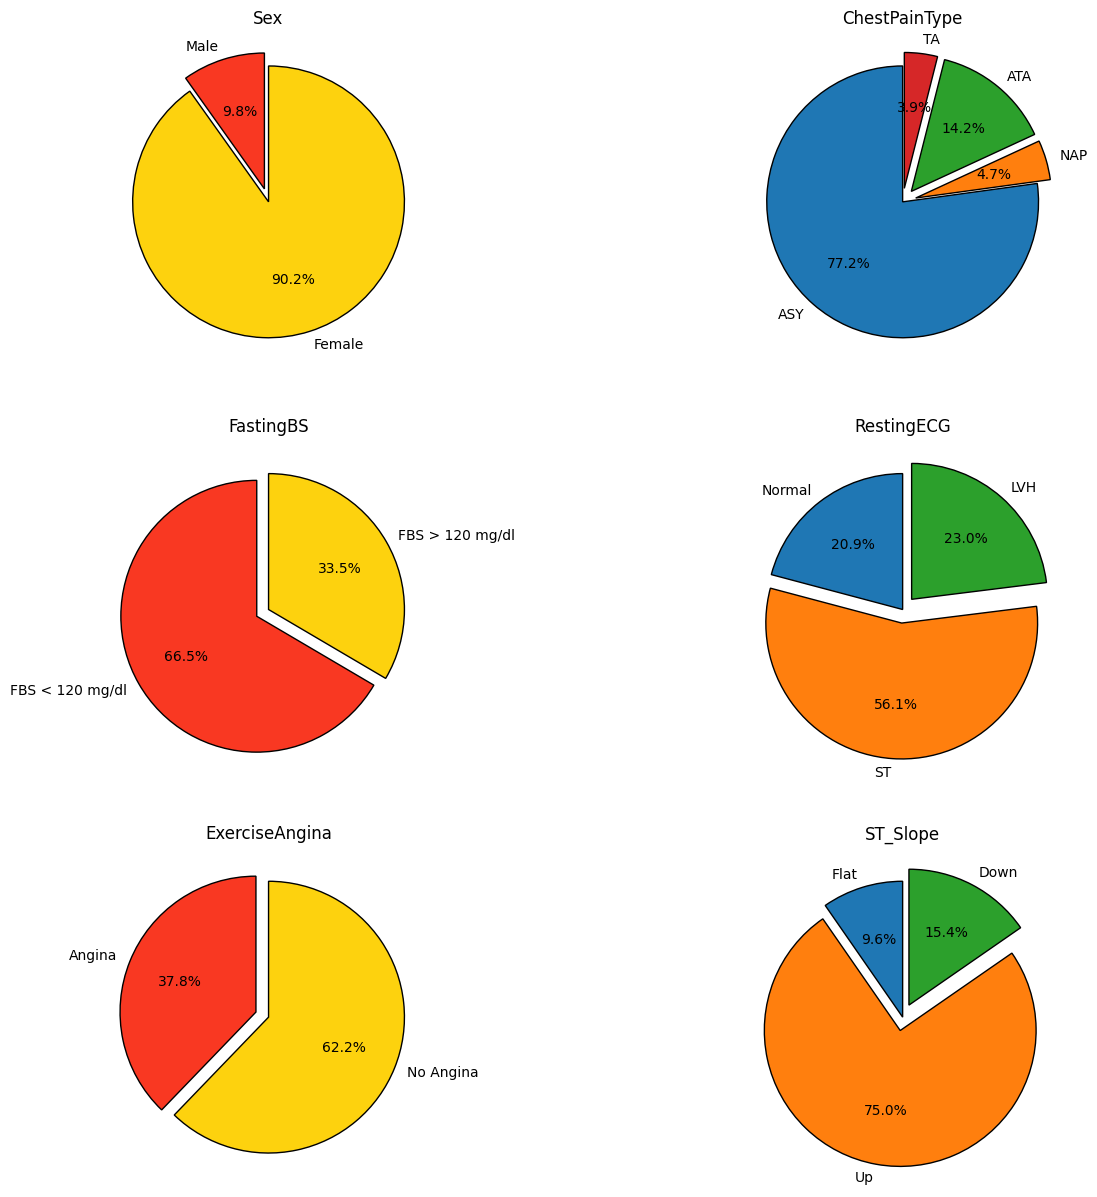

In [34]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');
plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

In [35]:
x_data = dataset.drop('HeartDisease', axis = 'columns')
target = dataset['HeartDisease']
y_data=target


In [36]:
y_data.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

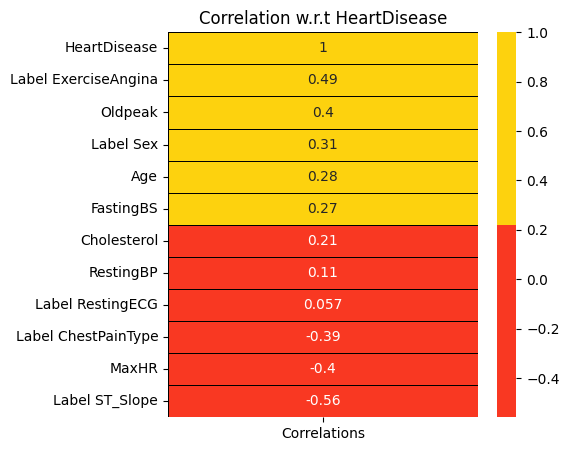

In [37]:
corr = dataset.corrwith(dataset['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [38]:
dataset.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Label Sex', 'Label ChestPainType', 'Label RestingECG',
       'Label ExerciseAngina', 'Label ST_Slope'],
      dtype='object')

In [39]:
features = dataset[dataset.columns.drop(['HeartDisease','RestingBP','Label RestingECG'])].values
target = dataset['HeartDisease'].values

In [40]:
from sklearn.model_selection import train_test_split


x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(features, target, train_size=0.8, random_state=42,stratify=y_data)

# KNN


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_data,y_train_data)
    pred_i = knn.predict(x_test_data)
    error_rate.append(np.mean(pred_i != y_test_data))
    print(i,np.mean(pred_i != y_test_data))

1 0.33695652173913043
2 0.358695652173913
3 0.33152173913043476
4 0.30434782608695654
5 0.29347826086956524
6 0.28804347826086957
7 0.29347826086956524
8 0.31521739130434784
9 0.2826086956521739
10 0.28804347826086957
11 0.29347826086956524
12 0.2826086956521739
13 0.28804347826086957
14 0.2826086956521739
15 0.27717391304347827
16 0.27717391304347827
17 0.28804347826086957
18 0.29347826086956524
19 0.28804347826086957
20 0.29347826086956524
21 0.29891304347826086
22 0.28804347826086957
23 0.29347826086956524
24 0.28804347826086957
25 0.29891304347826086
26 0.28804347826086957
27 0.29347826086956524
28 0.28804347826086957
29 0.29347826086956524
30 0.29891304347826086
31 0.29347826086956524
32 0.29891304347826086
33 0.30434782608695654
34 0.30434782608695654
35 0.30978260869565216
36 0.30978260869565216
37 0.30434782608695654
38 0.29891304347826086
39 0.30434782608695654


Text(0, 0.5, 'Error Rate')

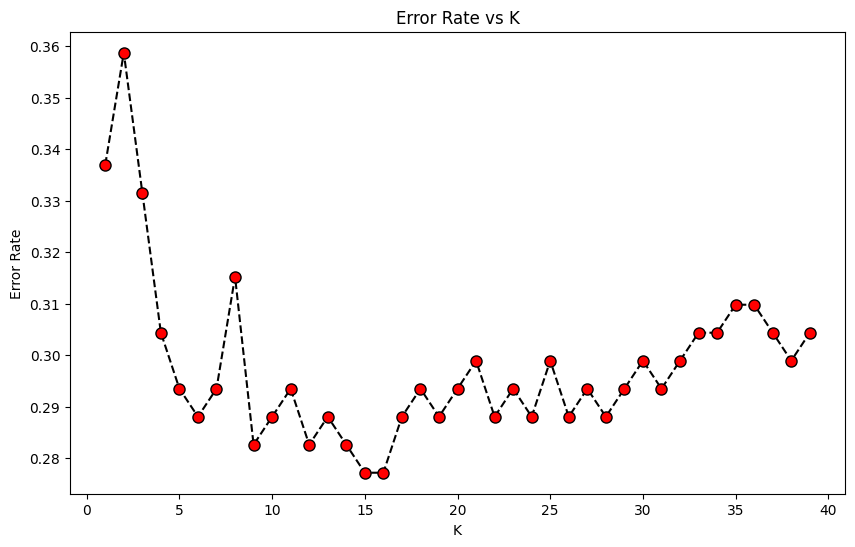

In [43]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_data, y_train_data)
y_pred = classifier.predict(x_test_data)
print(classification_report(y_test_data, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.64        82
           1       0.70      0.81      0.75       102

    accuracy                           0.71       184
   macro avg       0.71      0.69      0.69       184
weighted avg       0.71      0.71      0.70       184



>2, train: 0.846, test: 0.641,i 2.000 
>3, train: 0.847, test: 0.668,i 3.000 
>4, train: 0.807, test: 0.696,i 4.000 
>5, train: 0.796, test: 0.707,i 5.000 
>6, train: 0.768, test: 0.712,i 6.000 
>7, train: 0.760, test: 0.707,i 7.000 
>8, train: 0.747, test: 0.685,i 8.000 
>9, train: 0.743, test: 0.717,i 9.000 
>10, train: 0.738, test: 0.712,i 10.000 
>11, train: 0.740, test: 0.707,i 11.000 
>12, train: 0.736, test: 0.717,i 12.000 
>13, train: 0.734, test: 0.712,i 13.000 
>14, train: 0.730, test: 0.717,i 14.000 
>15, train: 0.725, test: 0.723,i 15.000 
>16, train: 0.734, test: 0.723,i 16.000 
>17, train: 0.736, test: 0.712,i 17.000 
>18, train: 0.741, test: 0.707,i 18.000 
>19, train: 0.734, test: 0.712,i 19.000 
>20, train: 0.736, test: 0.707,i 20.000 
>21, train: 0.733, test: 0.701,i 21.000 
>22, train: 0.734, test: 0.712,i 22.000 
>23, train: 0.733, test: 0.707,i 23.000 
>24, train: 0.732, test: 0.712,i 24.000 
>25, train: 0.729, test: 0.701,i 25.000 
>26, train: 0.729, test: 0.712,i

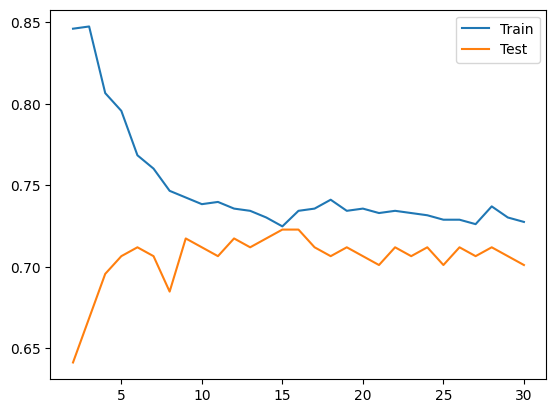

In [45]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 31)]

for i in values:
	
	modell = KNeighborsClassifier( n_neighbors=i)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f,i %.3f ' % (i, train_acc, test_acc,i))
	
 
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

>2, train: 0.906, test: 0.826,i 2.000 
>3, train: 0.958, test: 0.837,i 3.000 
>4, train: 0.956, test: 0.842,i 4.000 
>5, train: 0.966, test: 0.880,i 5.000 
>6, train: 0.980, test: 0.853,i 6.000 
>7, train: 0.984, test: 0.864,i 7.000 
>8, train: 0.984, test: 0.902,i 8.000 
>9, train: 0.982, test: 0.853,i 9.000 
>10, train: 0.985, test: 0.848,i 10.000 
>11, train: 0.995, test: 0.870,i 11.000 
>12, train: 0.997, test: 0.853,i 12.000 
>13, train: 0.992, test: 0.859,i 13.000 
>14, train: 0.996, test: 0.875,i 14.000 
>15, train: 0.993, test: 0.853,i 15.000 
>16, train: 0.996, test: 0.875,i 16.000 
>17, train: 0.992, test: 0.859,i 17.000 
>18, train: 0.992, test: 0.875,i 18.000 
>19, train: 0.992, test: 0.848,i 19.000 
>20, train: 0.995, test: 0.875,i 20.000 
>21, train: 0.996, test: 0.870,i 21.000 
>22, train: 0.997, test: 0.853,i 22.000 
>23, train: 0.993, test: 0.880,i 23.000 
>24, train: 0.997, test: 0.870,i 24.000 
>25, train: 1.000, test: 0.859,i 25.000 
>26, train: 0.999, test: 0.870,i

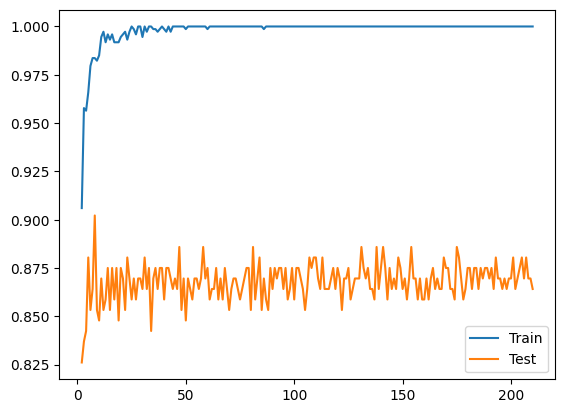

In [47]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 211)]

for i in values:
	
	modell = RandomForestClassifier( n_estimators=i)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f,i %.3f ' % (i, train_acc, test_acc,i))
	
 
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

# grid search

# KNN

In [48]:
KNN= KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1,71)}
KNN_model_2 = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=3)


In [49]:
KNN_Classifier_2 = KNN_model_2.fit(x_train_data, y_train_data)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.689) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.757) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.716) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.676) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.685) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.699) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.644) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.712) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.685) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.808) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.852, test=0.649) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

In [50]:
KNN_predictions_2 = KNN_Classifier_2.predict(x_test_data)


In [51]:
print(classification_report(y_test_data, KNN_predictions_2))


              precision    recall  f1-score   support

           0       0.72      0.59      0.64        82
           1       0.71      0.81      0.76       102

    accuracy                           0.71       184
   macro avg       0.71      0.70      0.70       184
weighted avg       0.71      0.71      0.71       184



In [52]:
print("Accuracy of scaled data:", accuracy_score(y_test_data, KNN_predictions_2))


Accuracy of scaled data: 0.7119565217391305


In [53]:
print(KNN_model_2.best_params_)

{'n_neighbors': 17}


In [54]:
modelll = KNeighborsClassifier(n_neighbors=14)
modelll.fit(x_train_data, y_train_data)	
test_yhat = modelll.predict(x_test_data)
test_acc = accuracy_score(y_test_data, test_yhat)
print("test  ",test_acc)
train_yhat = modelll.predict(x_train_data)
train_acc = accuracy_score(y_train_data, train_yhat)
print("train  ",train_acc)

test   0.717391304347826
train   0.7302452316076294


# Random Forest

 The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.

 Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.


In [55]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators':np.arange(10,150,5),
    'max_depth' : np.arange(10,150,5),
}
RF_model=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True,verbose=3)
RF_Classifier_2 = RF_model.fit(x_train_data, y_train_data) 

Fitting 3 folds for each of 784 candidates, totalling 2352 fits
[CV 1/3] END max_depth=10, n_estimators=10;, score=(train=0.982, test=0.804) total time=   0.0s
[CV 2/3] END max_depth=10, n_estimators=10;, score=(train=0.986, test=0.820) total time=   0.0s
[CV 3/3] END max_depth=10, n_estimators=10;, score=(train=0.973, test=0.865) total time=   0.0s
[CV 1/3] END max_depth=10, n_estimators=15;, score=(train=0.990, test=0.829) total time=   0.0s
[CV 2/3] END max_depth=10, n_estimators=15;, score=(train=0.990, test=0.824) total time=   0.0s
[CV 3/3] END max_depth=10, n_estimators=15;, score=(train=0.990, test=0.873) total time=   0.0s
[CV 1/3] END max_depth=10, n_estimators=20;, score=(train=0.988, test=0.808) total time=   0.0s
[CV 2/3] END max_depth=10, n_estimators=20;, score=(train=0.988, test=0.833) total time=   0.0s
[CV 3/3] END max_depth=10, n_estimators=20;, score=(train=0.990, test=0.861) total time=   0.0s
[CV 1/3] END max_depth=10, n_estimators=25;, score=(train=0.994, test=0.

In [96]:
RF_predictions_2=RF_model.predict(x_test_data)

In [108]:
import pickle
pickle.dump(RF_model, open('RF_Classifier_covid.sav', 'wb'))

In [57]:
print(classification_report(y_test_data,RF_predictions_2))



              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



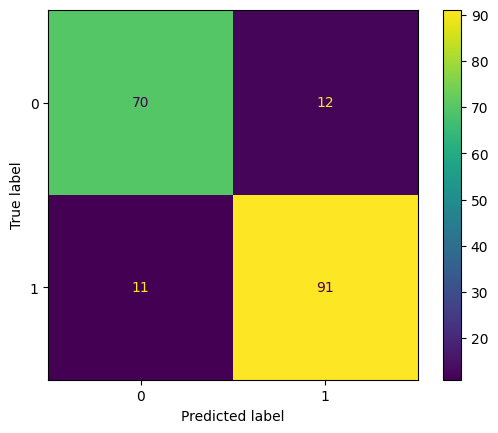

In [58]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,RF_predictions_2), 
                                    display_labels=RF_model.classes_)
cm_display.plot()
plt.show()

In [59]:
print(RF_model.best_params_)

{'max_depth': 130, 'n_estimators': 25}


In [60]:
print(RF_model.best_score_)

0.8556261849001895


In [61]:
RF_predictions_2 = RF_Classifier_2.predict(x_test_data)


In [62]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, RF_predictions_2))


Accuracy of unscaled data: 0.875


In [63]:
print(classification_report(y_test_data,RF_predictions_2))
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]


              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



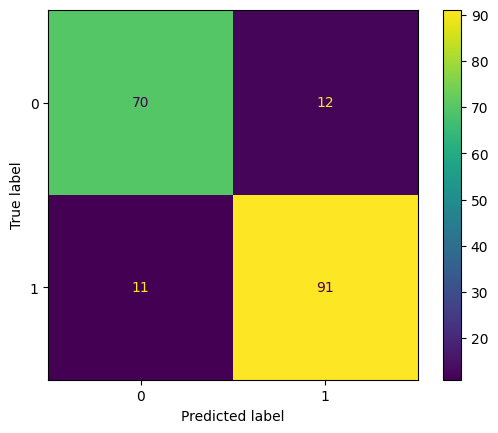

In [64]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,RF_predictions_2), 
                                    display_labels=RF_model.classes_)
cm_display.plot()
plt.show()

# Neural Network

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
NN_model_2 = MLPClassifier()


In [67]:
param_grid = { 
    'hidden_layer_sizes':(8,8,8,8),
    'activation' : ['identity','logistic','tanh','relu'],
    'solver' : ['lbfgs', 'sgd','adam'],
    'max_iter' :(np.arange(200,500,50))
   
}

In [68]:
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
 #‘sgd’ refers to stochastic gradient descent.
#‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

nn_model=GridSearchCV(estimator=NN_model_2, param_grid=param_grid, cv=4, scoring='accuracy', return_train_score=True,verbose=3,n_jobs=-1)
NN_model_2 = nn_model.fit(x_train_data, y_train_data) 

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [69]:
print(NN_model_2.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': 8, 'max_iter': 200, 'solver': 'lbfgs'}


In [70]:
NN_model_2.best_score_

0.8569805773342837

In [71]:
mlp_predictions_2 = NN_model_2.predict(x_test_data)



In [72]:
print("Accuracy of scaled data:", accuracy_score(y_test_data, mlp_predictions_2))

Accuracy of scaled data: 0.8641304347826086


In [73]:
print(classification_report(y_test_data,mlp_predictions_2))


              precision    recall  f1-score   support

           0       0.89      0.79      0.84        82
           1       0.85      0.92      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



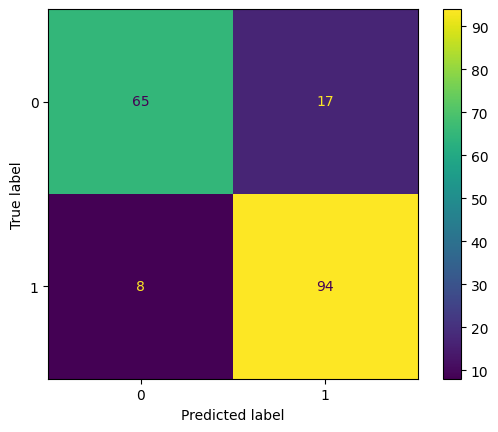

In [74]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,mlp_predictions_2), 
                                    display_labels=NN_model_2.classes_)
cm_display.plot()
plt.show()

### Decision tree 

In [75]:
classifier_2 = DecisionTreeClassifier( )
param_grid = { 
    'splitter':['best','random'],
    'max_leaf_nodes':  np.arange(2,50),
    'max_depth': np.arange(2,50)
    }
DD_model_2=GridSearchCV(estimator=classifier_2, param_grid=param_grid, cv= 5,return_train_score=True,verbose=3,n_jobs=-1)
DD_Classifier_2 = DD_model_2.fit(x_train_data, y_train_data) 

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


In [76]:
DD_Classifier_2_predictions_2 = DD_Classifier_2.predict(x_test_data)


In [77]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, DD_Classifier_2_predictions_2))

Accuracy of unscaled data: 0.8695652173913043


In [78]:
forest2 = RandomizedSearchCV(estimator = classifier_2, param_distributions = param_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest2.fit(x_train_data, y_train_data)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [79]:
forest2.best_params_

{'splitter': 'random', 'max_leaf_nodes': 18, 'max_depth': 18}

In [80]:

	modell = DecisionTreeClassifier( splitter ='random', max_leaf_nodes= 33, max_depth= 30)
	modell.fit(x_train_data, y_train_data)	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	print("test  " ,test_acc)
	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	print("train  ",train_acc)
	

 


test   0.8641304347826086
train   0.8923705722070845


 # ensamble

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [82]:
log = LogisticRegression()
rnd = RandomForestClassifier(bootstrap = True, max_depth= 55, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 40)



In [83]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('descion tree', DD_model_2)],
    voting='soft' , weights=[1,1,3] )

In [84]:
voting.fit(x_train_data, y_train_data)

c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(max_depth=55,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=40)),
                             ('descion tree',
                              GridSearchCV(cv=5,
                                           estimator=DecisionTreeClassifier(),
                                           n_jobs=-1,
                                           param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                                       'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                                       'splitter': ['best',
                                                                    'random']},
                                           return_train_score=True,
                                           verbose=3))],
                 voting='soft', weights=[1, 1, 3])

In [85]:
for clf in (log, rnd, DD_model_2, voting):
    clf.fit(x_train_data, y_train_data)
    y_pred = clf.predict(x_test_data)
    print(clf.__class__.__name__, accuracy_score(y_test_data, y_pred))

c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8586956521739131
RandomForestClassifier 0.8695652173913043
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
GridSearchCV 0.8695652173913043
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.8206521739130435


In [86]:

y_pred_2 = voting.predict(x_test_data)
print( accuracy_score(y_test_data, y_pred_2))

0.8206521739130435


In [87]:
print(classification_report(y_test_data,y_pred_2))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.83      0.84      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



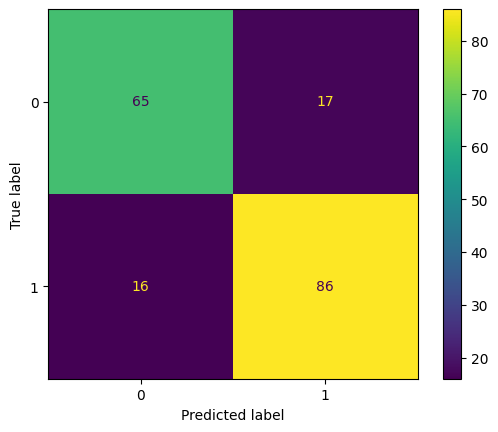

In [88]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,y_pred_2), 
                                    display_labels=voting.classes_)
cm_display.plot()
plt.show()

In [89]:
# import pickle
# pickle.dump(voting, open('voting_heart.sav','wb'))

# LogisticRegression

In [90]:
LogisticRegressionModel = LogisticRegression(solver='sag',C=1.0,random_state=33,max_iter=10000)

LogisticRegressionModel_1=LogisticRegressionModel.fit(x_train_data, y_train_data)



In [91]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel_1.score(x_train_data, y_train_data))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel_1.score(x_test_data, y_test_data))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel_1.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel_1.n_iter_)
print('----------------------------------------------------')




LogisticRegressionModel Train Score is :  0.8514986376021798
LogisticRegressionModel Test Score is :  0.8641304347826086
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [1625]
----------------------------------------------------


## SVC

In [92]:
mrange = list(np.arange(0.5, 10.5, 0.5))
mrange.append(0.1)
mrange.sort()
mrange = np.array(mrange)
mrange

array([ 0.1,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [93]:
# mrange = np.arange(0, 10.5, 0.5)
# mrange = np.arange(1, 11)

param_grid = {'C': mrange,
              'gamma': mrange,
            #   'degree': np.arange(1,6),
              'kernel': ['poly','linear','sigmoid','rbf']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
svc_grid.fit(x_train_data, y_train_data)

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.830 total time= 3.7min
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.878 total time= 3.9min
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.830 total time= 2.2min
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.823 total time= 1.5min
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.836 total time= 1.9min
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.830 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.844 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.871 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.810 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.558 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigm

KeyboardInterrupt: 

In [ ]:
print(f"Best Parameters: {svc_grid.best_params_} with best score {svc_grid.best_score_}")

Best Parameters: {'C': 2.5, 'gamma': 0.1, 'kernel': 'rbf'} with best score 0.8836877181847033


In [ ]:
svc_train_grid = svc_grid.predict(x_train_data)
svc_pred_grid = svc_grid.predict(x_test_data)

In [ ]:
print(classification_report(y_train_data,svc_train_grid))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       307
           1       0.92      0.96      0.94       381

    accuracy                           0.93       688
   macro avg       0.93      0.92      0.93       688
weighted avg       0.93      0.93      0.93       688



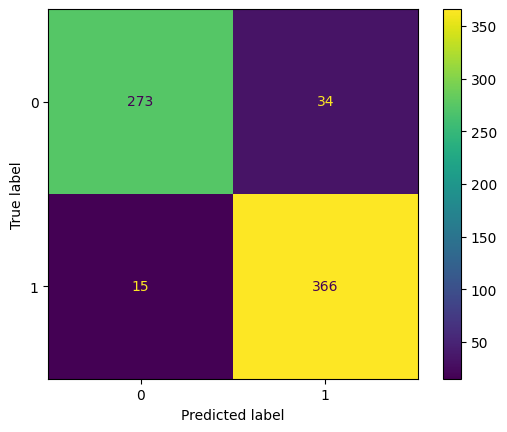

In [ ]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_data,svc_train_grid)
                                    , display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test_data,svc_pred_grid))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       103
           1       0.82      0.91      0.87       127

    accuracy                           0.84       230
   macro avg       0.85      0.84      0.84       230
weighted avg       0.85      0.84      0.84       230



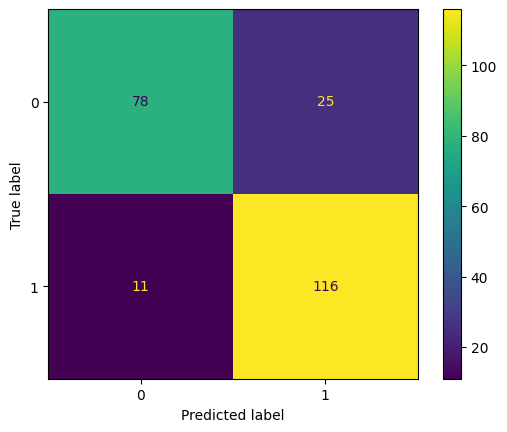

In [ ]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,svc_pred_grid), 
                                    display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()

In [ ]:
y_test_data

77     0
393    1
245    1
249    1
663    0
      ..
216    0
358    0
613    0
568    1
904    0
Name: HeartDisease, Length: 230, dtype: int64